# Sympy Tutorial
### Union College CHM 352
This tutorial is adapted from the notebooks "sympy_in_ten_minutes" from the Sympy documentation and "01-intro-sympy" from the Scipy 2017 Sympy Code Generation Tutorial
    
    

## Introduction

In this tutorial we will learn the basics of [Jupyter](http://jupyter.org/) and [SymPy](https://es.wikipedia.org/wiki/SymPy). SymPy is a Python library for symbolic computation. It provides computer algebra capabilities either as a standalone application, as a library to other applications, or live on the web as [SymPy Live](http://live.sympy.org/) or [SymPy Gamma](http://www.sympygamma.com/). Sympy is similar to other CAS (Computer Algebra Software) like Mathematica, Maple or Maxima.

A more complete tutorial can be found at [http://docs.sympy.org/latest/tutorial/index.html](http://docs.sympy.org/latest/tutorial/index.html).

Before using SymPy we should load it, like any other Python libary.

For scripting and working with other Python packages, it would be better to do the imports differently, for example

```python
import sympy as sym
```

and then call the functions from SymPy in the following manner

```python
x = sym.Symbols("x")
expr = sym.cos(x)**2 + 3*x
deriv = expr.diff(x)
```

where we computed the derivative of $\cos^2(x) + 3x$, that should be $-2\sin(x)\cos(x) + 3$. Note that this is how we have learned to import other libraries. In this notebook, we take a shortcut and just import all functions directly from the SymPy library, so any function you see without a library name in front of it must come from SymPy! Be warned!

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import * # this is the line where we will just import everything from they SymPy library

In [19]:
init_printing() # this sets us up to print beautiful equations with Latex

## Symbols
SymPy symbols are created with the `symbols()` function. You *must* assign a variable `a` to a symbol in order to perform symbolic manipulations. SymPy will not do this automatically for you like in Mathematica. SymPy expressions are built up from symbols, numbers, and SymPy functions.




In [20]:
x, y, z = symbols('x y z')

SymPy automatically pretty prints symbols with greek letters and subscripts.

In [21]:
alpha1, omega_2 = symbols('alpha1 omega_2')
alpha1, omega_2

In [22]:
sin(x + 1) - cos(y)

### Exercise

Write a symbolic expression for $$\frac{1}{\sqrt{2\pi\sigma^2} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }.$$ Remember that the function for $e^x$ is `exp(x)`. You will need to create symbols for `sigma` and `mu`. Square root is `sqrt`.

In [ ]:
# Write your answer here




**Note:** If you want to know more about a specific function you can use ``help()`` or the IPython magic command ``??``

## Substituting values
To replace a variable with a numerical values in a symbolic expression, use `subs` and specify the variable of interest.

In [102]:
expr = x + 1
expr

In [103]:
expr.subs(x,2)

Note that SymPy expressions are immutable. The `subs` function operates on expr to evaluate the function when x=2. But `expr` is left untouched afterwards.

In [104]:
expr

## Simplifying expressions

One of the most powerful features of SymPy is the ability to simplify a variety of complex mathematical expressions.

In [105]:
x, y, z = symbols ('x y z')
simplify (sin(x)**2 + cos(x)**2) # before evaluating this cell, do you recall this trigonometric identity?

In [106]:
simplify ((x**3 + x**2 - x -1)/(x**2 + 2*x + 1))

While `simplify` is extremely powerful, it has a couple major pitfalls. The "simplest" form of an expression is not so easily defined. So `simplify` will not always give us what we want. A second issues, is that `simplify` can be very slow in some cases as it applies all possible simplification operations and tries to decide which one is best. For both of these reasons, if you know *how* you would like to simplify your expression, there are more targeted functions avaialable. 

In [107]:
# expand a polynomial into the standard form of a sum of monomials
expand((x+1)**2)

In [108]:
expand((x+1)*(x-2)-(x-1)*x) # this one actually gets "simpler" after expanding!

In [109]:
# factor a polynomial into irreducible factors over the rational numbers
factor(x**2*z + 4*x*y*z + 4*y**2*z)

In [110]:
# collect common powers of x in an expression
collect(x*y + x - 3 + 2*x**2 -z*x**2 + x**3, x)

In [111]:
# take a rational function and cancel terms to arrive at the form p/q
cancel((x**2 + 2*x + 1)/(x**2 + x))

Other functions of interest `trigsimp`, `powsimp`, `logcombine`, `trigexpand`, `expand_power_exp`, `expand_power_base`, `powdenest`, `expand_log` will simplify and expand trigonometric, exponential, and logarithmic functions in various ways. See the documentation for much more detail.

## Floating point representation

Since Python packages outside of SymPy do not generally support symbolic representation it is useful to let SymPy evaluate a floating point approximation (up to a user specified number of digits).

In [97]:
sqrt(2)

In [98]:
sqrt(2).evalf(7)

### Exercise
Compute 100 digits of $\pi$.

In [ ]:
# Write your answer here


## Undefined functions

Undefined functions are created with `Function()`. Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [46]:
f = Function('f')

In [47]:
f(x) + 1

## Derivatives

Derivatives are computed with the `diff()` function, using the syntax `diff(expr, var1, var2, ...)`.

In [44]:
diff(sin(x + 1)*cos(y), x, y)

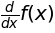

In [48]:
diff(f(x) + 1, x)

### Exercise

Write an expression representing the wave equation in one dimension: $${\partial^2 u\over \partial t^2 } = c^2 { \partial^2 u\over \partial  x^2}.$$ Remember that $u$ is a function in two variables. You can represent an equation using `Eq`, like

In [43]:
Eq(x, y)

In [ ]:
# Write your answer here


## Matrices
Matrices are created with `Matrix`. A matrix can contain any symbolic expression. See `Matrix?` for different ways to create a Matrix.

In [49]:
Matrix([[1, 2], [3, 4]])

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [50]:
# An unnested list will create a column vector
Matrix([1, 2, 3])

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

In [51]:
Matrix([x, y, z])

⎡x⎤
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

Matrices support all common operations, and have many methods for performing operations.

In [52]:
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

⎡ x + 2⋅y ⎤
⎢         ⎥
⎣3⋅x + 4⋅y⎦

In [65]:
M=Matrix([[1,2,3],[4,5,6]])
M.shape # report shape of matrix

In [66]:
M.T.shape # take transpose and report shape

Even calculating complicated expressions like the Jacobian matrix is as easy as:

In [53]:
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

⎡cos(x)     1     0⎤
⎢                  ⎥
⎢  1     -sin(y)  0⎥
⎢                  ⎥
⎣  0        0     1⎦

If you haven't seen it before, the Jacobian is defined as:

$$
J = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} &  \frac{\partial f_1}{\partial x_2} & \cdots \\
\frac{\partial f_2}{\partial x_1} &  \frac{\partial f_2}{\partial x_2} & ~ \\
\vdots                            &  ~ & \ddots \\
\end{bmatrix}
$$



In [69]:
Matrix([[1,1],[2,3]]).det() # calculate the determinant

The determinant is a scalar value derived from the entries of a matrix. For a 2 $\times$ 2 matrix, the determinant is defined as:
\begin{equation}
det\begin{pmatrix}a&b\\c&d\\ \end{pmatrix}=\begin{vmatrix}a&b\\c&d\\ \end{vmatrix}=ad-bc
\end{equation}
Determinants will be important for us later when we start to generate wavefunctions for many-electron atoms.

### Exercise

Create the following matrix $$\left[\begin{matrix}1 & 0 & 1\\-1 & 2 & 3\\1 & 2 & 3\end{matrix}\right]$$

In [ ]:
# Write your answer here


Now create a matrix representing $$\left[\begin{matrix}x\\y\\z\end{matrix}\right]$$ and multiply it with the previous matrix to get $$\left[\begin{matrix}x + z\\- x + 2 y + 3 z\\x + 2 y + 3 z\end{matrix}\right].$$



In [ ]:
# Write your answer here


Now take the Jacobian of that matrix with respect to your column vector, to get the original matrix back.

In [ ]:
# Write your answer here


## Matrix symbols

SymPy can also operate on matrices of symbolic dimension ($n \times m$). `MatrixSymbol("M", n, m)` creates a matrix $M$ of shape $n \times m$. 

In [92]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)

In [93]:
M*b

In [94]:
(M*b).shape

Some matrix expression functions do not evaluate unless you call `doit`.

In [95]:
Transpose(M*b)

In [96]:
Transpose(M*b).doit()

### Exercise

Write a matrix expression representing $$Au + Bv,$$ where $A$ and $B$ are $100\times 100$ and $u$ and $v$ are $100 \times 1$.

In [ ]:
# Write your answer here


## Solving systems of equations

A useful tool in your toolbelt when manipulating expressions is the ``solve`` function. `solve` solves equations symbolically (not numerically). The return value is a list of solutions.

You can give `solve` an `Eq`, or if you give it an expression, it automatically assumes that it is equal to 0.

In [40]:
solve(Eq(x**2, 4), x)

In [88]:
solve(x**2 + 3*x - 3, x)

It can also handle systems of equations. The return is a list of dictionaries, mapping symbols to solutions.

In [89]:
x, y, z = symbols('x y z')
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], [x, y])

### Exercises 

Solve the following system of equations: $$\begin{align}z &= x^2 - y^2\\z^2 &= x^2 + y^2 + 4\\z &= x + y\end{align}$$

In [ ]:
# Write your answer here


## Solving differential equations
If you are dealing with a differential equation, say:

$$
f''(x) = -f(x)
$$

SymPy's dsolve can (sometimes) produce an exact symbolic solution. Like `solve`, `dsolve` assumes that expressions are equal to 0. 

In [90]:
f = Function('f')

In [91]:
dsolve(f(x).diff(x, 2) + f(x))

### Exercise

Solve the following ODE: $$f''(x) + 2f'(x) + f(x) = \sin(x)$$

In [ ]:
# Write your answer here


### Plotting

We can make 2D and 3D plots. Note that `plot` is a SymPy function, not a `matplotlib` function. We are plotting an analytical function, not a function that we numerically evaluated at several points.

In [ ]:
from sympy.plotting import plot3d

<IPython.core.display.Javascript object>


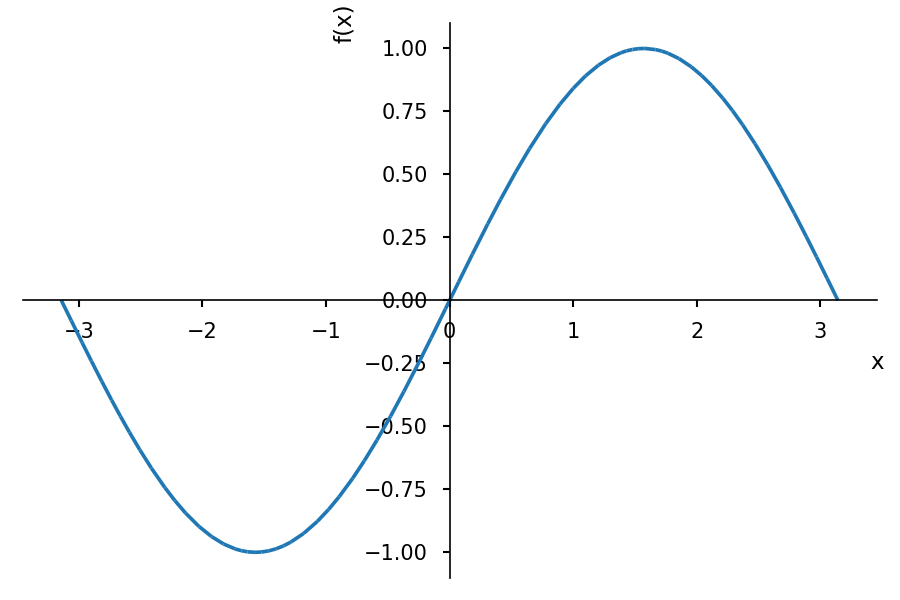

In [ ]:
plot(sin(x), (x, -pi, pi));

<IPython.core.display.Javascript object>


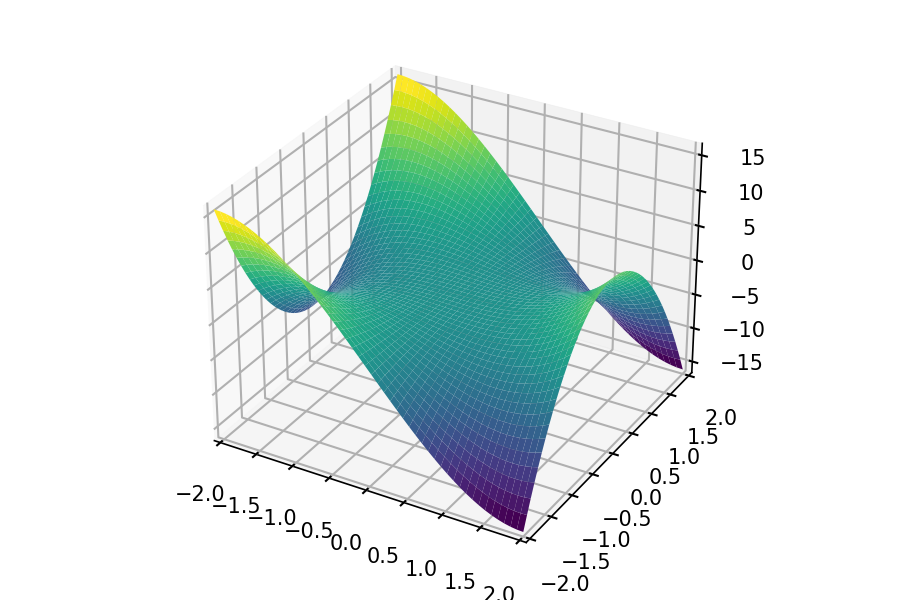

In [ ]:
monkey_saddle = x**3 - 3*x*y**2
p = plot3d(monkey_saddle, (x, -2, 2), (y, -2, 2))

## Turning Sympy expression into evaluable functions

``lambdify`` provides convenient functions to transform sympy expressions to lambda functions which can be used to calculate numerical values very fast. This is useful if you want to simplify a very calculated expression or differentiate/integrate a function symbolically first, and then use it for curve fitting or other numerical calculations.

Let's try a first example

In [ ]:
f = lambdify(x, x**2, "numpy")
f(3)

In [ ]:
f(np.array([1, 2, 3]))

array([1, 4, 9])

We can try a more difficult one

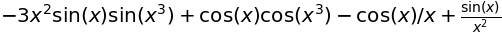

In [ ]:
fun = diff(sin(x)*cos(x**3) - sin(x)/x, x)
fun

In [ ]:
fun_numpy = lambdify(x, fun, "numpy")

and then evaluate it for some points in, let's say, $[0, 5]$

In [ ]:
pts = np.linspace(0, 5, 1000)
fun_pts = fun_numpy(pts + 1e-6) # To avoid division by 0

In [ ]:
plt.plot(pts, fun_pts)